<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1: K-Means by the algorithm

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [1]:

## Import Libraries

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

In [2]:
## Load the Iris dataset

# Load the Iris dataset from sklearn
iris = datasets.load_iris()

In [47]:
## Get some description about the data

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
## Convert data into a DataFrame

# Declare the columns names
columns = 'Sepal_Length Sepal_Width Petal_Length Petal_Width'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(iris.data, columns = columns)

In [7]:
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 150 rows and 4 columns
Basic Statistics about X__________________________________________________
       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Sample of X__________________________________________________
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6         

C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

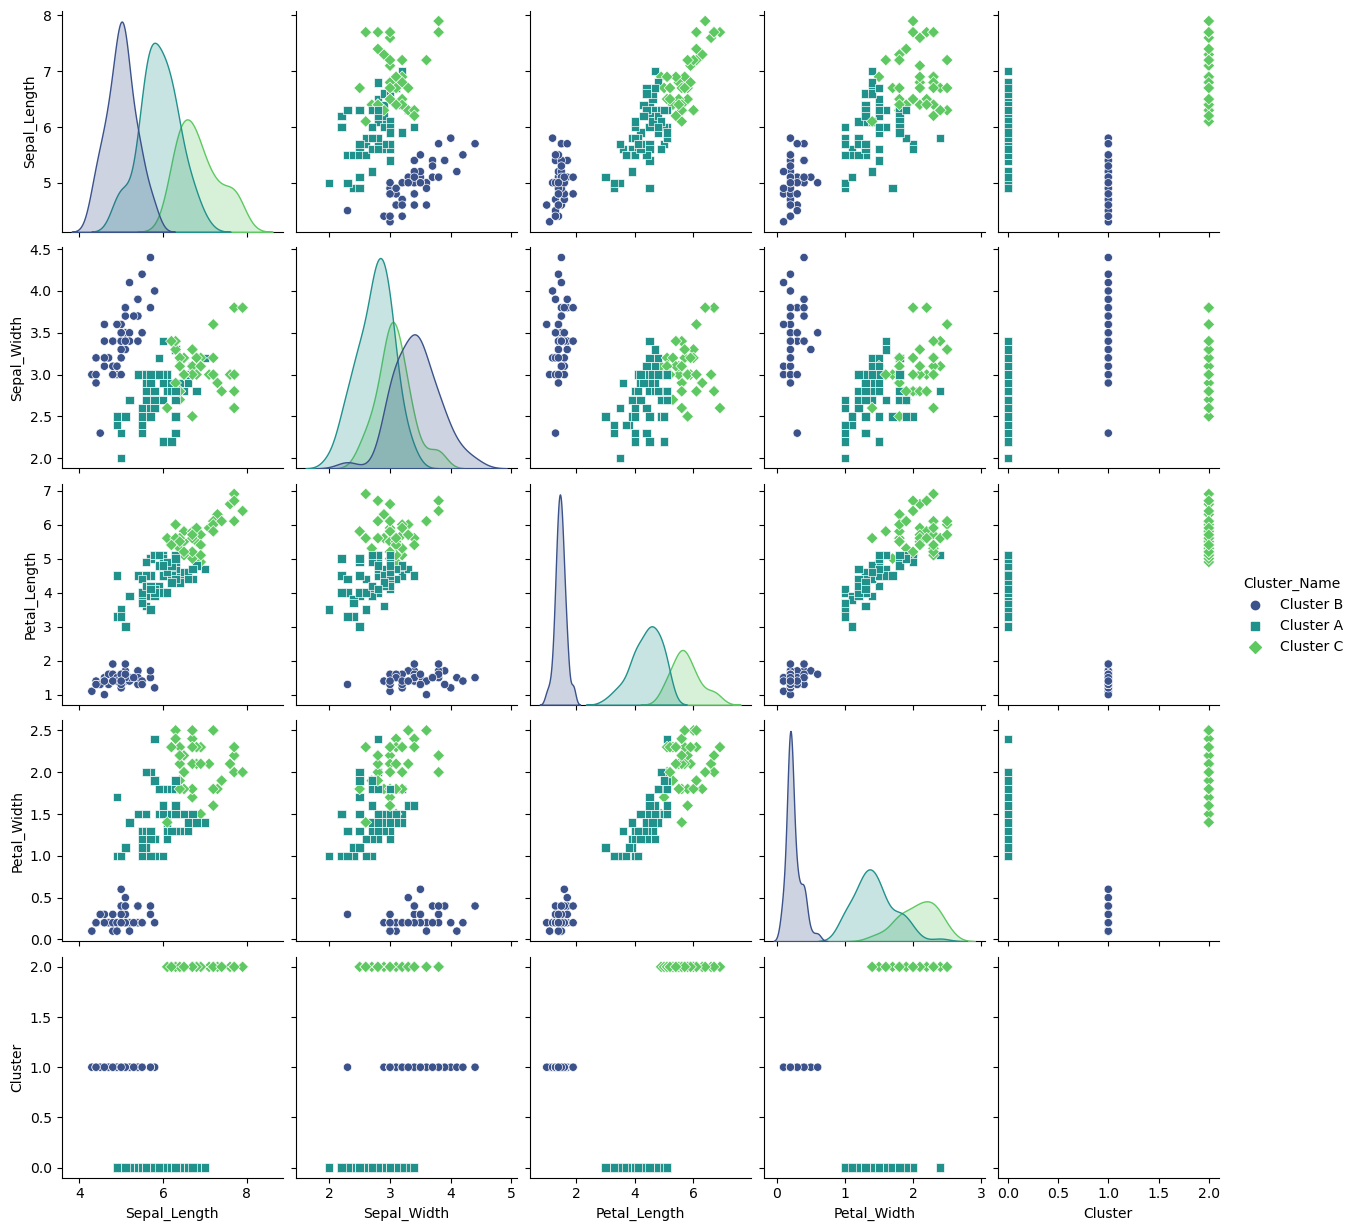

In [65]:
## Visualise the data points
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X)
X['Cluster'] = kmeans.labels_

def map_cluster_label(label):
    if label == 0:
        return 'Cluster A'
    elif label == 1:
        return 'Cluster B'
    elif label == 2:
        return 'Cluster C'
 # Apply the function to create a new column with descriptive cluster names
X['Cluster_Name'] = X['Cluster'].apply(map_cluster_label)

# visualise features in pairs
sns.pairplot(X, hue='Cluster_Name', palette='viridis', markers=['o', 's', 'D']) # which method 'plots' all the features in 'pairs'? Hint: Check the Seaborn library.
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

### Question: Which features could/should be used to cluster the data points?

In [ ]:
types:
Numerical Features: The Iris dataset contains four numerical features:
Sepal Length (cm)
Sepal Width (cm)
Petal Length (cm)
Petal Width (cm)
These features are continuous numerical variables that measure physical attributes of the iris flowers.

In [ ]:
Species: This is a categorical variable with three possible values:
0 - Setosa
1 - Versicolor
2 - Virginica

In [39]:
X['Species'] = iris.target
species_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
X['Species'] = X['Species'].map(species_names)



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


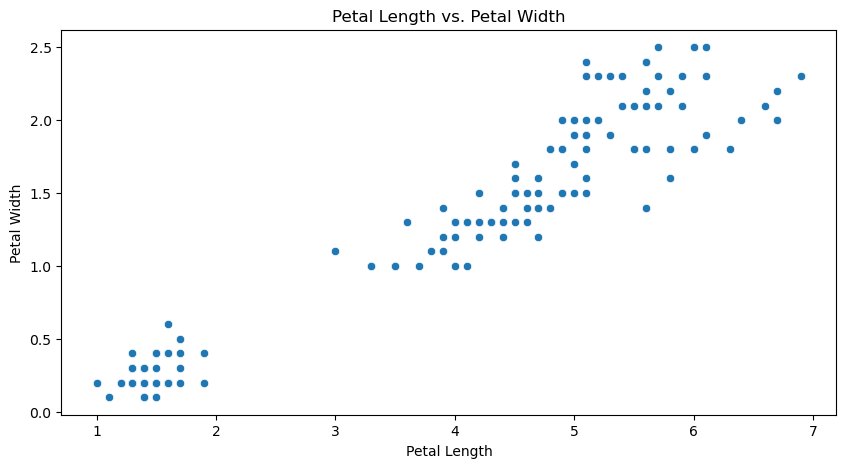

In [41]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X, x='Petal_Length', y='Petal_Width')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

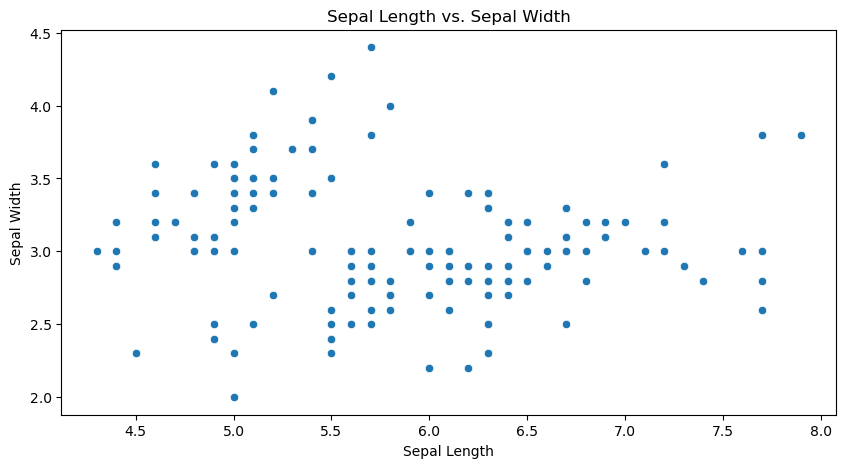

In [43]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X, x='Sepal_Length', y='Sepal_Width')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

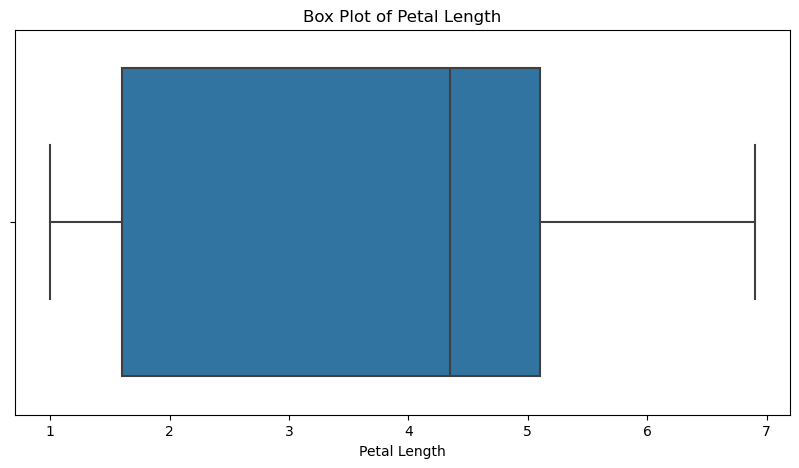

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=X, x='Petal_Length')
plt.title('Box Plot of Petal Length')
plt.xlabel('Petal Length')
plt.show()

In [13]:
df = pd.DataFrame({
    'Sepal_Length': [4.3, 7.9, 5.1, 6.4, 5.9],
    'Sepal_Width': [2.0, 3.8, 3.5, 3.2, 3.0],
    'Petal_Length': [1.0, 6.9, 1.4, 5.4, 5.1],
    'Petal_Width': [0.1, 2.5, 0.2, 2.3, 1.8]
})
min_values = df.min()
max_values = df.max()

print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

Minimum values:
Sepal_Length    4.3
Sepal_Width     2.0
Petal_Length    1.0
Petal_Width     0.1
dtype: float64

Maximum values:
Sepal_Length    7.9
Sepal_Width     3.8
Petal_Length    6.9
Petal_Width     2.5
dtype: float64


In [15]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
     """
    Create random centroids for K clusters across all dimensions.
    
    Parameters:
    - K (int): The number of clusters.
    - features (DataFrame): The dataset features to determine the range for centroids.

    Returns:
    - centroids (list of lists): A list of K centroids, where each centroid is a list of feature values.
    """
    # start with No centroids
     centroids = []

   # Determine the minimum and maximum values for each feature
     min_values = features.min()
     max_values = features.max()

    # need one centroid for each cluster
     for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
    
            x = np.random.uniform(min_values, max_values)
            dimensions.append(x)
   # add all dimensions for the centroids of each cluster
     centroids.append(dimensions)

     return centroids

In [17]:
K = 3
centroids = create_centroids(K, df)
print("Generated centroids:")
print(centroids)

Generated centroids:
[[array([6.646102  , 3.56249293, 3.65215699, 1.80949197]), array([7.42168446, 2.41665575, 6.58606696, 2.18569125]), array([6.77740035, 3.18272832, 4.59795475, 2.02379414]), array([7.13565533, 2.34356086, 1.16808762, 1.8644995 ])]]


The **Euclidean distance** between points `p` and `q` is the length of the line segment connecting them ($\overline{pq}$).

In **Cartesian coordinates**, if $p = (p_1, p_2,..., p_n)$ and $q = (q_1, q_2,..., q_n)$ are two points in **Euclidean n-space**, then the distance `d` from `p` to `q`, or from `q` to `p` is given by the **Pythagorean formula**:

$$
{\displaystyle {\begin{aligned}d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.\end{aligned}}}
$$

In [19]:
# Identify the closest centroid for a given data point
data_point = [4.5, 3.0, 5.0, 1.8] 
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d =  np.linalg.norm(p - q)
        # Hint: consider that the data has been converted to NumPy Arrays
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [21]:
result_index = closest_centroid(data_point, centroids)
print(f"Index of the closest centroid: {result_index}")


Index of the closest centroid: 0


In [45]:
data_point = np.array([4.5, 3.0, 5.0, 1.8])
centroids = np.array([
    [5.3, 3.5, 1.5, 0.3],
    [6.8, 3.2, 5.9, 2.1],
    [5.5, 2.6, 4.4, 1.2]
])
distances = np.linalg.norm(centroids - data_point, axis=1)
print("Distances:", distances)
# Find the index of the closest centroid
closest_index = np.argmin(distances)
print("Index of the closest centroid:", closest_index)

Distances: [3.92300905 2.49599679 1.37113092]
Index of the closest centroid: 2


In [99]:
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
})
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2])
centroids = [
    [1.5, 8.5],  # Centroid for cluster 0
    [4.5, 5.5],  # Centroid for cluster 1
    [7.5, 2.5]   # Centroid for cluster 2
]


In [101]:
# Function to update centroids
def update_centroid(X, y, centroids):
    """
    Recalculate centroids based on the mean of the members of each cluster.
    
    Parameters:
    - X (DataFrame): The dataset features.
    - y (array-like): Cluster assignments for each data point.
    - centroids (list of lists): Current centroids for the clusters.
    
    Returns:
    - c (list of lists): Updated centroids.
    """
    c = []
    
    # Iterate over each cluster index
    for i in range(len(centroids)):
        # Select data points assigned to the current cluster
        cluster_data = X[y == i]
        
        if cluster_data.shape[0] > 0:
            # Compute mean for each feature in the cluster
            dimensions = cluster_data.mean().tolist()
            c.append(dimensions)
        else:
            # If no points are assigned to this cluster, keep the previous centroid
            c.append(centroids[i])
    
    return c

In [103]:
updated_centroids = update_centroid(df, y, centroids)
print("Updated centroids:")
print(updated_centroids)

Updated centroids:
[[2.0, 8.0], [5.0, 5.0], [8.5, 1.5]]


In [116]:
def assign_clusters(X, centroids):
    """
    Assign each data point to the closest centroid.

    Parameters:
    - X (DataFrame): The dataset features.
    - centroids (list of lists): The current centroids of the clusters.

    Returns:
    - (array-like): Cluster assignments for each data point.
    """
    return X.apply(lambda row: closest_centroid(row, centroids), axis=1)

In [118]:
def plot_data(ax, X, y, centroids, features, show_clusters=True):
    a = [c[0] for c in centroids]
    b = [c[1] for c in centroids]
    
    colours = 'rgbykcm'
    if show_clusters:
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], 
                       c=colours[i], label=f'Cluster {i}', alpha=0.7)
    else:
        ax.scatter(X[features[0]], X[features[1]], label='Data Point', alpha=0.7)
    
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    
    ax.scatter(a, b, c='k', linewidths=5, marker='x', label='Centroid')
    for i in range(len(a)):
        c = colours[i] if show_clusters else 'k'
        ax.axvline(x=a[i], color=c, linestyle='--', linewidth=1)
        ax.axhline(y=b[i], color=c, linestyle='--', linewidth=1)
    
    centroid_text = '\n'.join([f'{i}: ({a:.3f}, {b:.3f})' for i, (a, b) in enumerate(centroids)])
    ax.text(max(X[features[0]]) * 0.9, min(X[features[1]]) * 1.1, centroid_text, fontsize=10)
    
    ax.legend()

In [124]:
cluster_assignments = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2])
centroids = [[2.0, 8.0], [5.0, 5.0], [8.5, 1.5]]


In [126]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, features, show_clusters=True):
    a = [c[0] for c in centroids]
    b = [c[1] for c in centroids]
    

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')

    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')
    for i in range(len(a)):
        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)

    # create a text to show the centroids' coordinates
    centroid_text = '\n'.join([f'{i}: ({a:.3f}, {b:.3f})' for i, (a, b) in enumerate(centroids)])
    ax.text(max(X[features[0]]) * 0.9, min(X[features[1]]) * 1.1, centroid_text, fontsize=10)

    ax.legend()

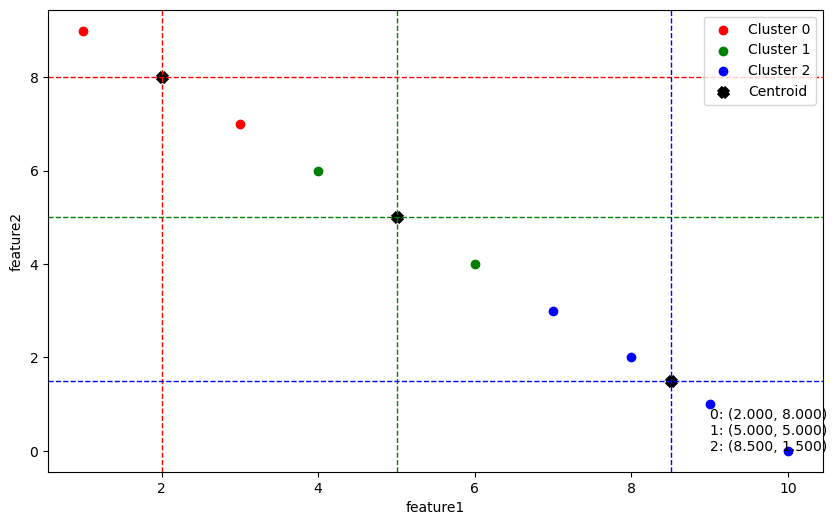

In [128]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_data(ax, df, cluster_assignments, centroids, ['feature1', 'feature2'])
plt.show()

In [130]:
# Select K initial centroids randomly
# Number of clusters
K = 3

def create_centroids(K, features):
    """
    Randomly select K centroids from the dataset.
    
    Parameters:
    - K (int): Number of centroids to select.
    - features (DataFrame): The dataset features.
    
    Returns:
    - centroids (list of lists): List of K selected centroids.
    """
     # Randomly sample K indices from the dataset
    indices = np.random.choice(features.shape[0], K, replace=False)
    
    # Extract the rows corresponding to these indices as centroids
    centroids = features.iloc[indices].values.tolist()
    
    return centroids

# Extract the features to be used for clustering (first two features)
features = df[['feature1', 'feature2']]

# Create K initial centroids
centroids = create_centroids(K, features)

print("Selected initial centroids:")
print(centroids)

Selected initial centroids:
[[5, 5], [8, 2], [3, 7]]


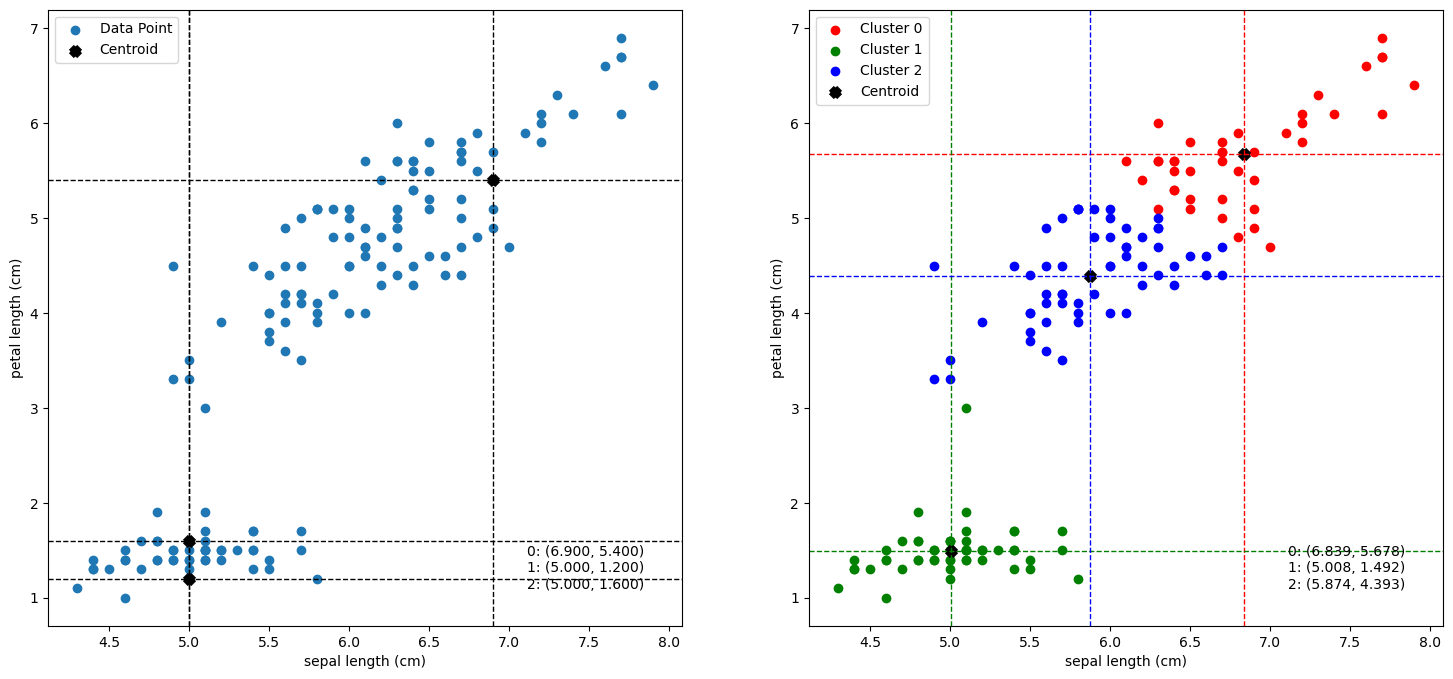

In [134]:
# Initialize centroids
centroids = create_centroids(K, iris_df[features])

# Plot the data points and initial centroids (Before)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
plot_data(axes[0], iris_df, None, centroids, features, show_clusters=False)

# Repeat until centroids do not change
while True:
    # Assign clusters
    y = assign_clusters(iris_df[features], centroids)
    
    # Store old centroids
    old_c = np.array(centroids)
    
    # Update centroids
    centroids = update_centroid(iris_df[features], y, centroids)
    
    # Check for convergence
    if np.allclose(np.array(centroids), old_c):
        break

# Plot the data points identified by cluster and final centroids (After)
plot_data(axes[1], iris_df, y, centroids, features)
plt.show()

>

>

>



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



